## Topic 2. Linear modeling and linear programming


In this lecture we will exercise the graphical solution of the linear problem
and the different stages in solving the problem using python libraries
As additional documentation see slides of the lecture and following references:

http://benalexkeen.com/linear-programming-with-python-and-pulp/


In [12]:
# We start by importing the python libraries required to solve the problems

%matplotlib inline


import numpy as np
import pylab as plt
import matplotlib.cm as cm
import matplotlib
from PIL import Image as im
import math
#import cv2
import os

import pulp
import pyomo
#import mdptoolbox


import pandas as pd 

from IPython.display import display
from IPython.display import Image

We use one of the linear models presented in the literature. Notice how to use latex language within a cell. The model is defined as follows:

In [13]:
%%latex

\begin{eqnarray*}
\max \ z=6x_{1}+3x_{2} \\
\mbomodel[{subject to}\hspace{1.8cm}\\
2model[_{1}+4model[_{2} \leq 8  \\
-x_{1}+4x_{2} \leq 4  \\
x_{1}-x_{2} \leq 2    \\
x_{1}, x_{2} \geq 0    \\
\end{eqnarray*}



<IPython.core.display.Latex object>

This problems has two variables (x1 and x2) and five constraints.
Now, we construct the graphical solution of the problem and represent the feasible region of solutions. What we do to create the graphical representation of the problem is to define each constraint as a function (one free variable and one dependent variable). Then we draw these lines. 

## Graphical representation of the solutions

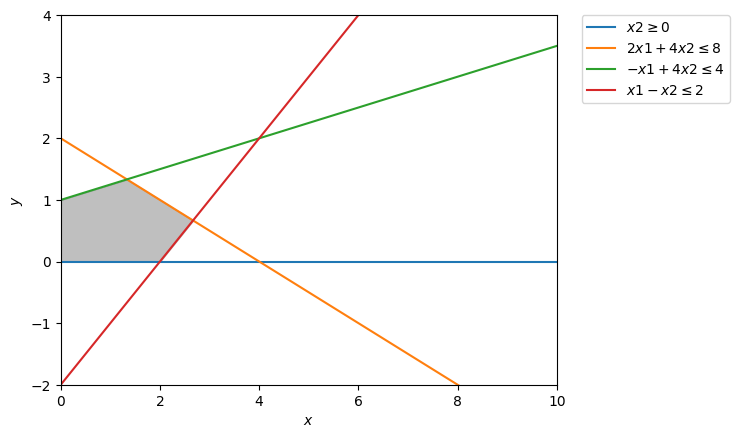

In [14]:
# This example shows the graphical representation of a linear problem
# First each of the constraints is defined as a line 
# Then we shade the area of the feasible solutions

# Construct lines
# x1 > 0
x1 = np.linspace(0, 20, 2000)
# x2 >= 0
y1 = (x1*0) 
# 2model[1] + 4x2 <= 8
y2 = (8-2*x1)/4.0
# -model[1] + 4x2 <= 4 
y3 = (4+x1)/4.0
# x1 - x2 <= 2 
y4 = x1 - 2


# Show the lines plots

plt.plot(x1, y1, label=r'$x2\geq0$')
plt.plot(x1, y2, label=r'$2x1 + 4x2 \leq 8$')
plt.plot(x1, y3, label=r'$-x1 +4x2 \leq 4$')
plt.plot(x1, y4, label=r'$x1 -x2 \leq 2$')
plt.xlim((0, 10))
plt.ylim((-2, 4))
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')

# Determine the feasible region and fill it
# First, we create two "horizontal lines"  y5 and y6 that delimit the polygonon
y5 = np.minimum(y2, y3)
y6 = np.maximum(y1, y4)

# The function "fill_between" shades an area delimited two horizontal curves)
plt.fill_between(x1,y5, y6, where=y5>y6, color='grey', alpha=0.5)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

## Definition of a linear problem using the library pulp 

Pulp is a Python library that serves to model problems using linear programming and can also be used to find the solutions of the model.
You may get more details about Pulp here: https://coin-or.github.io/pulp/

In the following, the objective function and constraints of a simple linear problem are defined

In [15]:
# We define the problem as of maximization
simple_lp_problem = pulp.LpProblem("A very simple LP problem", 
                                   pulp.LpMaximize)

# Variables x1,x2 are defined and their lower bounds are set according to the constraints x1,x2>=0
X1 = pulp.LpVariable('X1', lowBound=0, cat='Continuous')
X2 = pulp.LpVariable('X2', lowBound=0, cat='Continuous')


# Objective function
simple_lp_problem += 6 * X1 + 3 * X2, "z"

# Constraints
simple_lp_problem += 4 * X2 <= 8 - 2 * X1
simple_lp_problem += 4 * X2 <= 4 + X1 
simple_lp_problem += X2 >= X1 - 2

# Visualization of the model
simple_lp_problem   
    

/home/ag6154lk/KISA/.venv/lib/python3.12/site-packages/pulp/pulp.py:1298: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


A_very_simple_LP_problem:
MAXIMIZE
6*X1 + 3*X2 + 0
SUBJECT TO
_C1: 2 X1 + 4 X2 <= 8

_C2: - X1 + 4 X2 <= 4

_C3: - X1 + X2 >= -2

VARIABLES
X1 Continuous
X2 Continuous

## Solving a linear problem using pulp


In the next step the problem is solved using the default solver of pulp.
The optimal solution is visualized

In [16]:
# The solver is invoked
simple_lp_problem.solve()

# The status of the solver is shown
print("The status of the solution found is: ", pulp.LpStatus[simple_lp_problem.status])

# The optimal values for each of the variables are displayed
print("The optimal values for the variables are: ")
for variable in simple_lp_problem.variables():
    print ("{} = {}".format(variable.name, variable.varValue))

# The best solution is printed    
print("Optimal value: ",pulp.value(simple_lp_problem.objective))

    

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /home/ag6154lk/KISA/.venv/lib/python3.12/site-packages/pulp/solverdir/cbc/linux/64/cbc /tmp/7ff1d1f95ac84ebda8a70b6599be6476-pulp.mps -max -timeMode elapsed -branch -printingOptions all -solution /tmp/7ff1d1f95ac84ebda8a70b6599be6476-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 8 COLUMNS
At line 17 RHS
At line 21 BOUNDS
At line 22 ENDATA
Problem MODEL has 3 rows, 2 columns and 6 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 3 (0) rows, 2 (0) columns and 6 (0) elements
0  Obj -0 Dual inf 8.9999998 (2)
0  Obj -0 Dual inf 8.9999998 (2)
2  Obj 18
Optimal - objective value 18
Optimal objective 18 - 2 iterations time 0.002
Option for printingOptions changed from normal to all
Total time (CPU seconds):       0.00   (Wallclock seconds):       0.00

The status of the solution found is:  Optimal
The optimal values f

We can access the variables and values within the pulp object

In [17]:
print("Variable  0 is ",+simple_lp_problem.variables()[0])
print("Its value is ",+simple_lp_problem.variables()[0].varValue)

Variable  0 is  X1
Its value is  2.6666667


Finally we plot the optimal solution as part of the feasible set of solutions

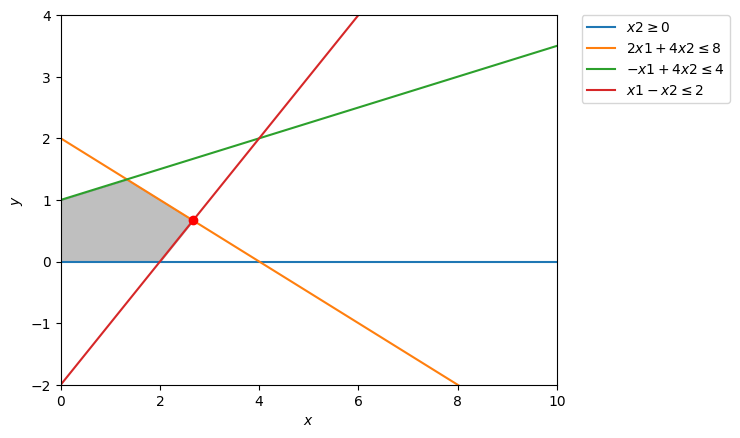

In [18]:

# Show the lines plots

plt.plot(x1, y1, label=r'$x2\geq0$')
plt.plot(x1, y2, label=r'$2x1 + 4x2 \leq 8$')
plt.plot(x1, y3, label=r'$-x1 +4x2 \leq 4$')
plt.plot(x1, y4, label=r'$x1 -x2 \leq 2$')
plt.xlim((0, 10))
plt.ylim((-2, 4))
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')

# Determine the feasible region and fill it
# First, we create two "horizontal lines"  y5 and y6 that delimit the polygonon
y5 = np.minimum(y2, y3)
y6 = np.maximum(y1, y4)

# The function "fill_between" shades an area delimited two horizontal curves)
plt.fill_between(x1,y5, y6, where=y5>y6, color='grey', alpha=0.5)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.plot(simple_lp_problem.variables()[0].varValue,simple_lp_problem.variables()[1].varValue,'ro')
plt.show()

## Definition of a linear problem using the library pyomo

Pyomo is another Python library that allows us to model Mathematical Programs. You may get more details about Pyomo here: https://pyomo.readthedocs.io/en/stable/pyomo_overview/math_modeling.html


We will use the same linear problem used above. We reproduce its definition here

In [19]:
%%latex

\begin{eqnarray*}
\max \ z=6x_{1}+3x_{2} \\
\mbox{subject to}\hspace{1.8cm}\\
2x_{1}+4x_{2} \leq 8  \\
-x_{1}+4x_{2} \leq 4  \\
x_{1}-x_{2} \leq 2    \\
x_{1}, x_{2} \geq 0    \\
\end{eqnarray*}


<IPython.core.display.Latex object>

In [32]:

# First, the required function definitions from pyomo are read
from pyomo.environ import *
from pyomo.opt import SolverFactory
    
    
# We define  an abstract model    
model = AbstractModel()

# model.I stores the indices of variables in the problems (we have two variables)
model.I = Set(initialize = [1,2])

# The variables are defined from the indices, thus we have x[1] and x[2]
model.x = Var(model.I, within=NonNegativeReals)

# The objective function is defined as a python function
def  obj_rule(model):
  ans =  6*model.x[1] + 3*model.x[2]  
  return ans

# We indicate the model which is the Objective functions
model.cost = Objective(rule=obj_rule,sense=maximize)



In [33]:

# It follows the definitions of the three constraints
# Each constraint is defined as a Python function
# Indications are given to the model of which are the constraints

def c1_rule(model):          
   ans =  2*model.x[1] + 4*model.x[2]   
   return ans<=8.0

model.c1 =  Constraint(rule=c1_rule)

def c2_rule(model):
   ans = -model.x[1] + 4*model.x[2]
   return ans<=4.0

model.c2 =  Constraint(rule=c2_rule)

def c3_rule(model):
   ans = model.x[1] - model.x[2]
   return ans<=2.0

model.c3 =  Constraint(rule=c3_rule)



## To run the next cell, substitute "myemail@ehu.eus" by your own email

In [34]:
# Finally, an instance of the model is created and it is solved
# using a predefined solver

instance = model.create_instance()




# The solver glpk will be used to solve the problem. More information about glpk from here:
# https://www.gnu.org/software/glpk/
type_solver = 'glpk'

# We could also have used a "remote solver" by removing the comments from
# the following t line
type_solver = 'remote'


# The solver is used to solve the problem
if type_solver=='remote':
  opt = SolverFactory("ipopt")
  solver_manager = SolverManagerFactory('neos')
  os.environ['NEOS_EMAIL'] = 'myemail@ehu.eus'   
  results = solver_manager.solve(instance, opt=opt,load_solutions=False)
    
elif  type_solver=='glpk':   
  opt = SolverFactory('glpk')    
  results = opt.solve(instance,load_solutions=False)

# The results of the optimization are shown
results.write()
#print("Objective: %s" % (model.cost()))


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 3
  Number of variables: 2
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: Ipopt 3.14.12\x3a Optimal Solution Found
  Termination condition: optimal
  Id: 0
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 1
  number of solutions displayed: 1
- Status: optimal
  Message: Ipopt 3.14.12\x3a Op

## Exercise 2

Solve the problem described in the following image using pulp and pyomo.

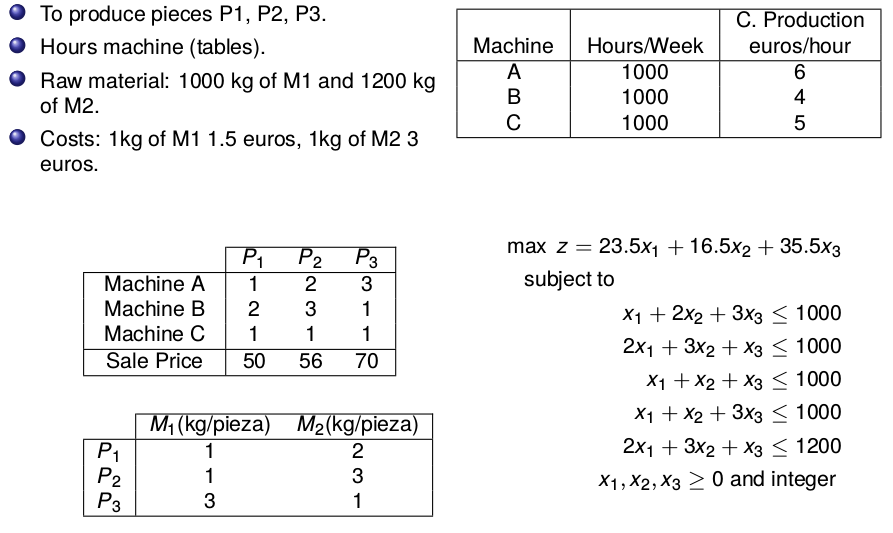

In [ ]:
# We read an image describing the Production problem
i = Image(filename='Production_Problem.png')
i

In [27]:
# Resolution using Pulp
problem = pulp.LpProblem("Exercise 2", pulp.const.LpMaximize)

X1 = pulp.LpVariable('X1', lowBound= 0, cat= 'Integer')
X2 = pulp.LpVariable('X2', lowBound= 0, cat= 'Integer')
X3 = pulp.LpVariable('X3', lowBound= 0, cat= 'Integer')

# Objective Function
problem += 23.5 * X1 + 16.5 * X2 + 35.5 * X3, 'z'

# Constraints
problem += X1   +   2*X2    +   3*X3    <= 1000
problem += 2*X1 +   3*X2    +   X3      <= 1000
problem += X1   +   X2      +   X3      <= 1000
problem += X1   +   X2      +   3*X3    <= 1000
problem += 2*X1 +   3*X2    +   X3      <= 1200

# Solve the problem
problem.solve()

print(f"The status of the solution found is: {pulp.LpStatus[problem.status]}")
for i, x in enumerate(problem.variables()):
    print(f"Optimal value for {x.name} = {x.varValue}")
print(f"Optimal solution Z = {pulp.value(problem.objective)}")




Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /home/ag6154lk/KISA/.venv/lib/python3.12/site-packages/pulp/solverdir/cbc/linux/64/cbc /tmp/6afc419315b1419d976e8e60e7ca66e9-pulp.mps -max -timeMode elapsed -branch -printingOptions all -solution /tmp/6afc419315b1419d976e8e60e7ca66e9-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 10 COLUMNS
At line 35 RHS
At line 41 BOUNDS
At line 45 ENDATA
Problem MODEL has 5 rows, 3 columns and 15 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 16500 - 0.00 seconds
Cgl0004I processed model has 4 rows, 3 columns (3 integer (0 of which binary)) and 12 elements
Cutoff increment increased from 1e-05 to 0.4999
Cbc0012I Integer solution of -16500 found by DiveCoefficient after 0 iterations and 0 nodes (0.00 seconds)
Cbc0001I Search completed - best objective -16500, took 0 iterations and 0 nodes (0.00 seconds)

In [37]:
# Resolution using Pyomo
model2 = AbstractModel()
model2.I = Set(initialize = [1, 2, 3])
model2.x = Var(model.I, within= NonNegativeIntegers)

# Define the objective function
def objective_function(model):
    return 23.5 * model.x[1] + 16.5 * model.x[2] + 35.5 * model.x[3]
model2.cost = Objective(rule = objective_function, sense = maximize)

# Define constraints
def constraint_1(model):
    return model.x[1] + 2*model.x[2] + 3*model.x[3] <= 1000
model2.c1 = Constraint(rule = constraint_1)

def constraint_2(model):
    return 2*model.x[1] + 3*model.x[2] + model.x[3] <= 1000
model2.c2 = Constraint(rule = constraint_2)

def constraint_3(model):
    return model.x[1] + model.x[2] + model.x[3] <= 1000
model2.c3 = Constraint(rule = constraint_3)

def constraint_4(model):
    return model.x[1] + model.x[2] + 3*model.x[3] <= 1000
model2.c4 = Constraint(rule = constraint_4)

def constraint_5(model):
    return 2*model.x[1] + 3*model.x[2] + model.x[3] <= 1200
model2.c5 = Constraint(rule = constraint_5)

# Solve the problem with remote solver
instance2 = model2.create_instance()
opt = SolverFactory("ipopt")
solver_manager = SolverManagerFactory('neos')
os.environ['NEOS_EMAIL'] = 'myemail@ehu.eus' 

retsults = solver_manager.solve(instance2, opt = opt, load_solutions = False)
results.write()

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 3
  Number of variables: 2
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: Ipopt 3.14.12\x3a Optimal Solution Found
  Termination condition: optimal
  Id: 0
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 1
  number of solutions displayed: 1
- Status: optimal
  Message: Ipopt 3.14.12\x3a Op

## Exercise 3


A plant produces two types of refrigerators, A and B. There are two production lines, one dedicated to producing refrigerators of Type A, the other to producing refrigerators of Type B. The capacity of the production line for A is 60 units per day, the capacity of the production line for B is 50 units per day. A requires 20 minutes of labor whereas B requires 40 minutes of labor. Presently, there is a maximum of 40 hours of labor per day which can be assigned to either production line. Profit contributions are 20 dol. per refrigerator of Type A produced and 30 dol. per Type B produced. What should the daily production be? Show the space of feasible solutions and solve the problem using pyomo. 


## Exercise 4


The manufacture of the two parts, A and B, of a certain machine requires the processes of type: L, S, D, M, and G. The time of each process to operate on each part and the number of simultaneosly available processes are given in the table below (hour per unity).

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;}
.tg th{font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;}
.tg .tg-erlg{font-weight:bold;background-color:#efefef;vertical-align:top}
.tg .tg-x9s4{font-weight:bold;background-color:#9b9b9b;vertical-align:top}
.tg .tg-u8fl{font-weight:bold;background-color:#9aff99;vertical-align:top}
.tg .tg-yw4l{vertical-align:top}
</style>
<table class="tg">
  <tr>
    <th class="tg-erlg" colspan="6">Process</th>
  </tr>
  <tr>
    <td class="tg-x9s4">Part</td>
    <td class="tg-x9s4">L</td>
    <td class="tg-x9s4">S</td>
    <td class="tg-x9s4">D</td>
    <td class="tg-x9s4">M</td>
    <td class="tg-x9s4">G</td>
  </tr>
  <tr>
    <td class="tg-u8fl">A</td>
    <td class="tg-yw4l">0.6</td>
    <td class="tg-yw4l">0.4</td>
    <td class="tg-yw4l">0.1</td>
    <td class="tg-yw4l">0.5</td>
    <td class="tg-yw4l">0.2</td>
  </tr>
  <tr>
    <td class="tg-u8fl">B</td>
    <td class="tg-yw4l">0.9</td>
    <td class="tg-yw4l">0.1</td>
    <td class="tg-yw4l">0.2</td>
    <td class="tg-yw4l">0.3</td>
    <td class="tg-yw4l">0.3</td>
  </tr>
  <tr>
    <td class="tg-u8fl">Availability</td>
    <td class="tg-yw4l">10</td>
    <td class="tg-yw4l">3</td>
    <td class="tg-yw4l">4</td>
    <td class="tg-yw4l">6</td>
    <td class="tg-yw4l">5</td>
  </tr>
</table>

Each one can be used during 8 hours, 30 days per month.

1) Determine the optimal production strategy to maximize the total number of parts A and B manufactured in a month.

2) If the number of parts A must be equal to the number of parts B, what is the optimal strategy?
